# Assignment 8 : Xarray

** Due Thursday, Nov. 26 **

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://eosweb.larc.nasa.gov/project/ceres/ceres_table).

![radiation budget](https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg)
_Public domain, by NASA, from Wikimedia Commons_

I have pre-downloaded and subsetted a portion of this dataset for use in our class. You can download it here:
http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It will take a minute or two to download.

Considering reviewing the [FAQs](https://eosweb.larc.nasa.gov/faq-page/ceres-faq#t67n120) for this dataset before getting started.

Start by importing xarray, numpy, and matplotlib

In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 1.1) Open the dataset and explore its contents using `print` and `.info()`


In [2]:
ds = xr.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc')
ds

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float64 43.85 43.85 43.85 ...
    toa_lw_all_mon               (time, lat, lon) float64 139.6 139.6 139.6 ...
    toa_net_all_mon              (time, lat, lon) float64 -126.4 -126.4 ...
    toa_sw_clr_mon               (time, lat, lon) float64 64.47 64.47 64.47 ...
    toa_lw_clr_mon               (time, lat, lon) float64 136.6 136.6 136.6 ...
    toa_net_clr_mon              (time, lat, lon) float64 -143.9 -143.9 ...
    toa_cre_sw_mon               (time, lat, lon) float64 20.62 20.62 20.62 ...
    toa_cre_lw_mon               (time, lat, lon) float64 -3.054 -3.054 ...
    toa_cre_net_mon 

In [3]:
print(ds)

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float64 43.85 43.85 43.85 ...
    toa_lw_all_mon               (time, lat, lon) float64 139.6 139.6 139.6 ...
    toa_net_all_mon              (time, lat, lon) float64 -126.4 -126.4 ...
    toa_sw_clr_mon               (time, lat, lon) float64 64.47 64.47 64.47 ...
    toa_lw_clr_mon               (time, lat, lon) float64 136.6 136.6 136.6 ...
    toa_net_clr_mon              (time, lat, lon) float64 -143.9 -143.9 ...
    toa_cre_sw_mon               (time, lat, lon) float64 20.62 20.62 20.62 ...
    toa_cre_lw_mon               (time, lat, lon) float64 -3.054 -3.054 ...
    toa_cre_net_mon 

In [4]:
ds.info()

xarray.Dataset {
dimensions:
	lat = 180 ;
	lon = 360 ;
	time = 203 ;

variables:
	float32 lon(lon) ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
		lon:valid_range = [   0.  360.] ;
	float64 toa_sw_all_mon(time, lat, lon) ;
		toa_sw_all_mon:long_name = Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions ;
		toa_sw_all_mon:standard_name = TOA Shortwave Flux - All-Sky ;
		toa_sw_all_mon:CF_name = toa_outgoing_shortwave_flux ;
		toa_sw_all_mon:units = W m-2 ;
		toa_sw_all_mon:valid_min =       0.00000 ;
		toa_sw_all_mon:valid_max =       600.000 ;
	float64 toa_lw_all_mon(time, lat, lon) ;
		toa_lw_all_mon:long_name = Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions ;
		toa_lw_all_mon:standard_name = TOA Longwave Flux - All-Sky ;
		toa_lw_all_mon:CF_name = toa_outgoing_longwave_flux ;
		toa_lw_all_mon:units = W m-2 ;
		toa_lw_all_mon:valid_min =       0.00000 ;
		toa_lw_all_mon:valid_max =       400.0

## 1.2) Print out the `long_name` attribute of each variable

In [5]:
ds.lon.long_name, ds.lat.long_name, ds.time.long_name

('longitude', 'latitude', 'time')

In [6]:
for i in list(ds.data_vars):
    vars_longname = ds[i].long_name
    print(str(i)+': '+str(vars_longname))

toa_sw_all_mon: Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon: Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon: Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon: Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon: Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon: Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon: Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon: Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon: Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon: Incoming Solar Flux, Monthly Means
cldarea_total_daynight_mon: Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
cldpress_total_daynight_mon: Cloud Effective Pressure, Monthly Me

## 2.1) Calculate the time-mean of the entire dataset

In [7]:
ds_mean = ds.mean(dim='time')
ds_mean

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (lat, lon) float64 122.3 122.3 122.3 122.3 ...
    toa_lw_all_mon               (lat, lon) float64 141.1 141.1 141.1 141.1 ...
    toa_net_all_mon              (lat, lon) float64 -91.29 -91.29 -91.29 ...
    toa_sw_clr_mon               (lat, lon) float64 119.9 119.9 119.9 119.9 ...
    toa_lw_clr_mon               (lat, lon) float64 140.2 140.2 140.2 140.2 ...
    toa_net_clr_mon              (lat, lon) float64 -88.03 -88.03 -88.03 ...
    toa_cre_sw_mon               (lat, lon) float64 -2.331 -2.33 -2.331 ...
    toa_cre_lw_mon               (lat, lon) float64 -0.9217 -0.9217 -0.9217 ...
    toa_cre_net_mon              (lat, lon) float64 -3.253 -3.251 -3.252 ...
    solar_mon                    

## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

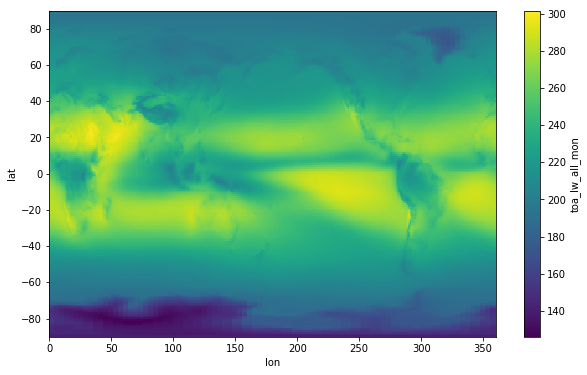

In [9]:
ds_mean.toa_lw_all_mon.plot()

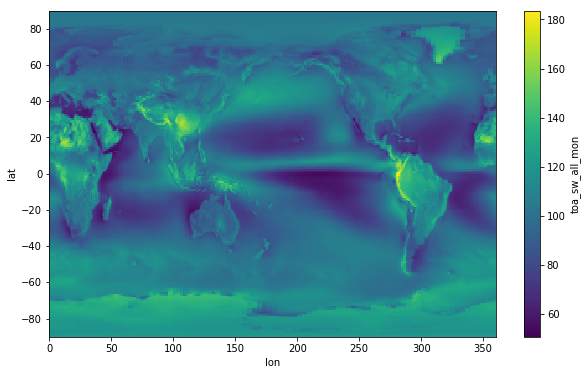

In [10]:
ds_mean.toa_sw_all_mon.plot()

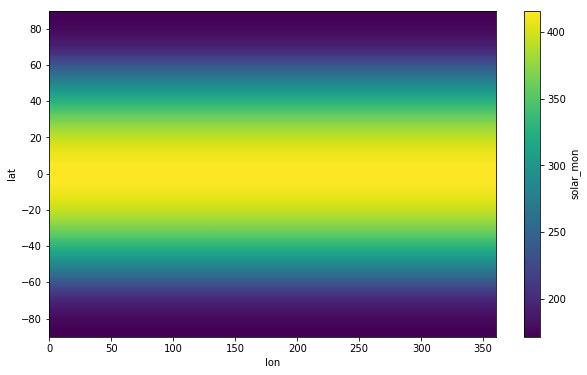

In [11]:
ds_mean.solar_mon.plot()

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

Again, you have to pay attention to and think about the sign conventions for each variable in order to get this to work.

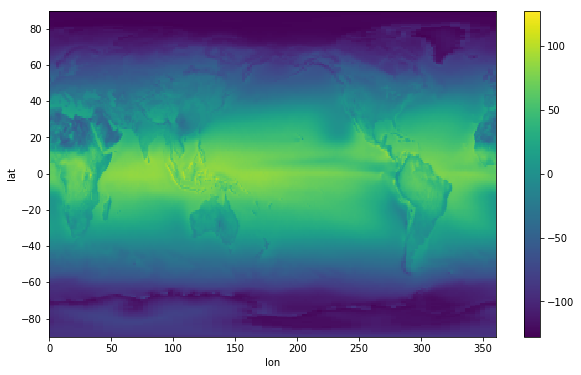

In [12]:
(ds_mean.solar_mon - ds_mean.toa_lw_all_mon - ds_mean.toa_sw_all_mon).plot(cmap='viridis')

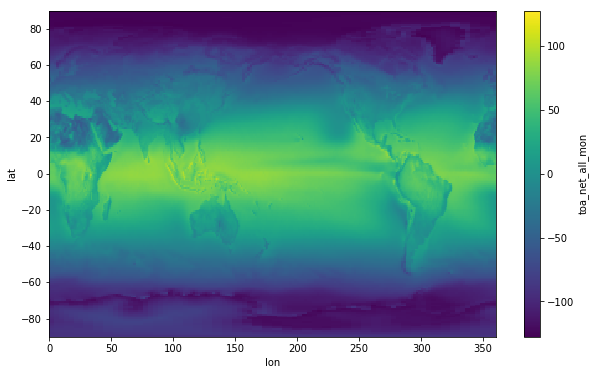

In [13]:
ds_mean.toa_net_all_mon.plot(cmap='viridis')

## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [14]:
global_mean_net = ds_mean.toa_net_all_mon.mean()
print('Global mean of TOA net radiation: '+str("%.4f" % global_mean_net.values)+' W/m^2')

Global mean of TOA net radiation: -28.7290 W/m^2


The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

In [15]:
weight = np.cos(np.radians(ds.lat))
weight = weight / weight.mean()
print('Weight mean: '+str(weight.mean().values))

Weight mean: 1.0000001947932333


Text(0,0.5,'weight')

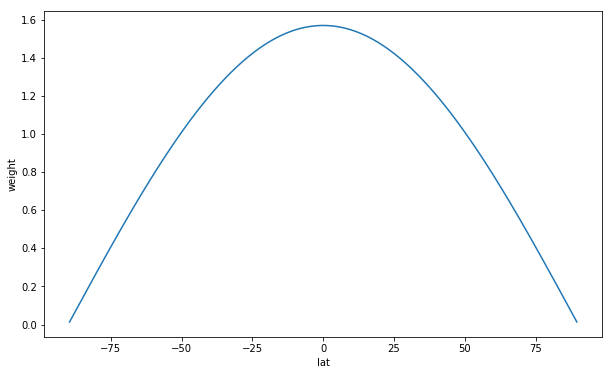

In [16]:
weight.plot()
plt.ylabel('weight')

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [17]:
toa_net_global_mean = (weight * ds_mean.toa_net_all_mon).mean()
print('Global mean TOA net radiation: '+ str("%.4f" % toa_net_global_mean.values)+' W/m^2')

Global mean TOA net radiation: 0.8781 W/m^2


This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above

**TOA incoming solar**

In [18]:
(weight * ds_mean.solar_mon).mean()

<xarray.DataArray ()>
array(340.28519189191263)

**Mean Outgoing LW**

In [19]:
mean_outgoing_lw = (weight * ds_mean.toa_lw_all_mon).mean()
mean_outgoing_lw

<xarray.DataArray ()>
array(240.2680337494855)

**Mean Outgoing SW**

In [20]:
mean_outgoing_sw = (weight * ds_mean.toa_sw_all_mon).mean()
mean_outgoing_sw

<xarray.DataArray ()>
array(99.13906221224708)

**Mean Outgoing**

In [21]:
mean_outgoing = (mean_outgoing_sw + mean_outgoing_lw )
mean_outgoing

<xarray.DataArray ()>
array(339.4070959617326)

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, I know the Earth is not a sphere...it's just a homework problem).

In [22]:
dλ = np.radians(1)
dϕ = np.radians(1)

pixel_area = xr.ones_like(weight)
pixel_area = ( ds.lon * 0 ) + (6371000**2)*np.cos(np.radians(ds.lat))*dλ*dϕ          # 2D DataArray

In [23]:
tot_pixel_area = pixel_area.sum()            # sum of all pixel areas
tot_pixel_area

<xarray.DataArray ()>
array(510070949952645.7)

In [24]:
surf_area = 4 * np.pi * (6371000**2)         # surface area of an Earth sized sphere
surf_area

510064471909788.25

In [25]:
tot_pixel_area / surf_area                   # ratio of total pixel area to surface area

<xarray.DataArray ()>
array(1.000012700439286)

**The ratio of the total area of pixels to the area of an Earth sized sphere is about 1**

Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

Text(0.5,1,'Total amount of radiation in each 1$^\\circ$ latitude band')

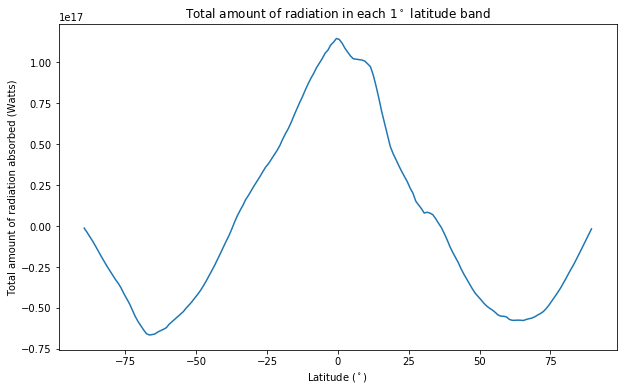

In [26]:
(pixel_area * 360 * ds_mean['toa_net_all_mon']).sum(dim='lon').plot()
plt.ylabel('Total amount of radiation absorbed (Watts)')
plt.xlabel('Latitude ($^\circ$)')
plt.title('Total amount of radiation in each 1$^\circ$ latitude band')

## 4.3) Plot the cumulatuve sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

Text(0.5,0,'Latitude ($^\\circ$)')

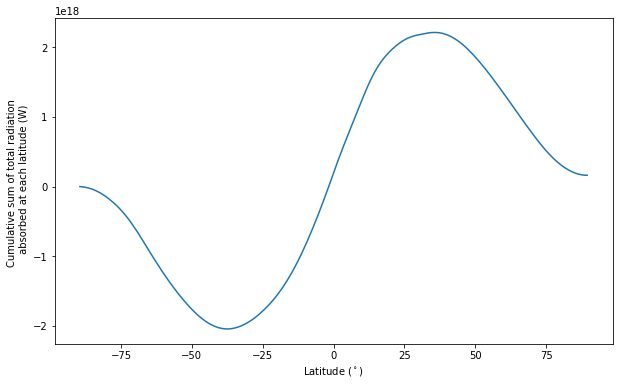

In [27]:
(pixel_area * 360 * ds_mean['toa_net_all_mon']).sum(dim='lon').cumsum(dim='lat').plot()
plt.ylabel('Cumulative sum of total radiation \n absorbed at each latitude (W)')
plt.xlabel('Latitude ($^\circ$)')

You should get a curve tht looks something like this

![meridional energy transport](http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.gif)

## 5.1) Plot the time-mean cloud area fraction (day and night)

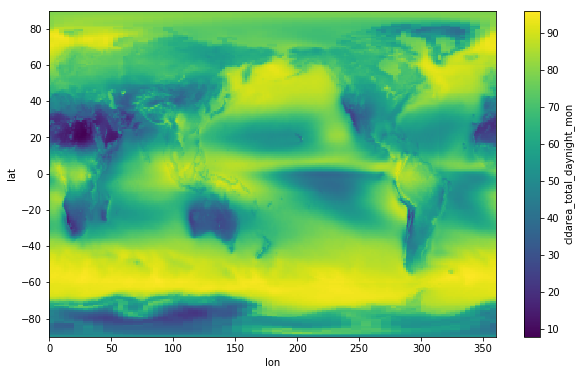

In [28]:
caf = ds.cldarea_total_daynight_mon
caf.mean(dim='time').plot()

## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [29]:
low_clouds = caf <= 25
high_clouds = caf >= 75

## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful.

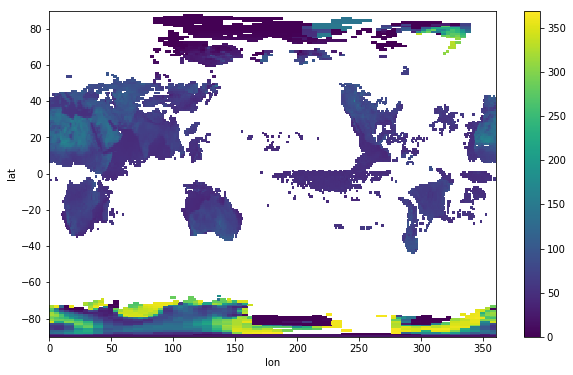

In [30]:
ds.toa_sw_all_mon.where(low_clouds).mean(dim='time').plot()

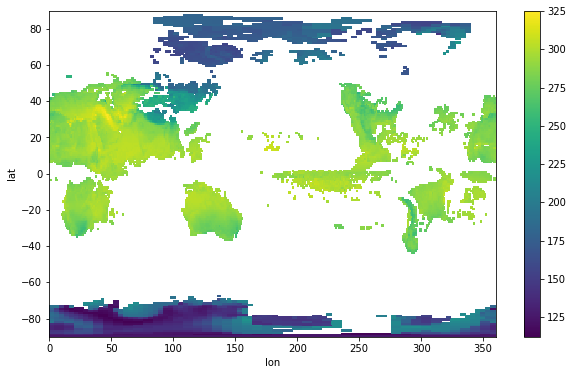

In [31]:
ds.toa_lw_all_mon.where(low_clouds).mean(dim='time').plot()

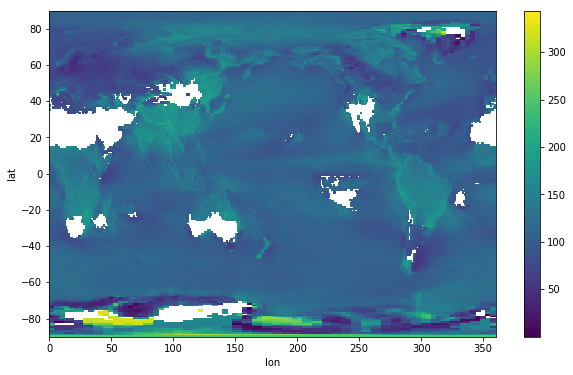

In [32]:
ds.toa_sw_all_mon.where(high_clouds).mean(dim='time').plot()

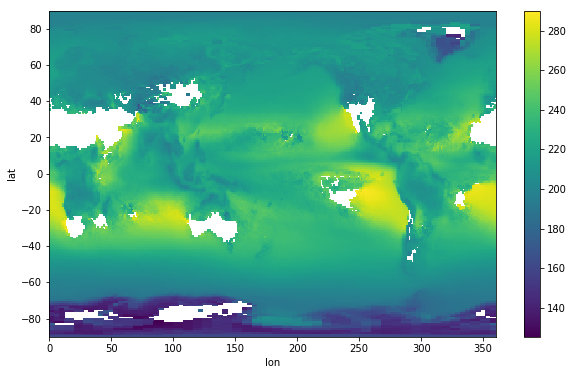

In [33]:
ds.toa_lw_all_mon.where(high_clouds).mean(dim='time').plot()

## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

What is the overall effect of clouds on shortwave and longwave radiation?

**SW radiation in Low cloud regions**

In [34]:
(weight* ds.toa_sw_all_mon.where(low_clouds).mean(dim='time')).mean()

<xarray.DataArray ()>
array(70.1775759210279)

**LW radiation in Low cloud regions**

In [35]:
(weight* ds.toa_lw_all_mon.where(low_clouds).mean(dim='time')).mean()

<xarray.DataArray ()>
array(251.77800706585197)

**SW radiation in High cloud regions**

In [36]:
(weight* ds.toa_sw_all_mon.where(high_clouds).mean(dim='time')).mean()

<xarray.DataArray ()>
array(111.93387038126552)

**LW radiation in High cloud regions**

In [37]:
(weight* ds.toa_lw_all_mon.where(high_clouds).mean(dim='time')).mean()

<xarray.DataArray ()>
array(223.26830581584474)

**ANSWER**:
> High cloud coverage increases the amount of outgoing shortwave radiation, since solar radiation gets reflected by clouds.

> High cloud coverage decreases the amount of outgoing longwave radiation, since the clouds absorbs the longwave radiation from the Earth.

## 6.1) Create a new dataset with the monthly seasonal cycle removed


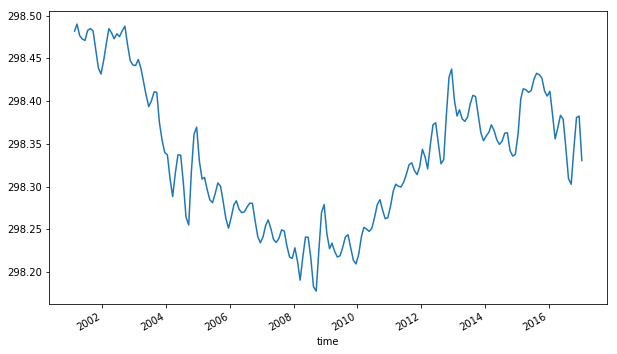

In [38]:
# tested this out visually with the Incoming Solar Flux 
ds.solar_mon.rolling(time=12).mean(dim='time').mean(dim='lat').mean(dim='lon').plot()

In [39]:
ds_mon_removed = ds.rolling(time=12).mean(dim='time').mean(dim='lat').mean(dim='lon')
ds_mon_removed

<xarray.Dataset>
Dimensions:                      (time: 203)
Coordinates:
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
Data variables:
    toa_sw_all_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_lw_all_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_net_all_mon              (time) float64 nan nan nan nan nan nan nan ...
    toa_sw_clr_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_lw_clr_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_net_clr_mon              (time) float64 nan nan nan nan nan nan nan ...
    toa_cre_sw_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_cre_lw_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_cre_net_mon              (time) float64 nan nan nan nan nan nan nan ...
    solar_mon                    (time) float64 nan nan nan nan nan nan nan ...
    cldarea_total_daynight_m

## 6.2) Load the NINO3.4 index data we calculated and output during class and add it as a coordinate variable to the anomaly dataset

In [40]:
import os

In [41]:
os.chdir('C://Users/sukic/Documents/Research_Computing/AllMaterial/research_computing/content/lectures/python')
nino34_ds = xr.open_dataset('nino34_index.nc')
nino34_ds

<xarray.Dataset>
Dimensions:  (time: 684)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 1960-03-15 ...
Data variables:
    nino34   (time) object 'none' 'none' 'none' 'none' 'none' 'none' 'none' ...
    oni      (time) float64 nan nan -0.3521 -0.3079 -0.2109 -0.2408 -0.2258 ...

In [42]:
ds_new = xr.merge([ds_mon_removed, nino34_ds])
ds_new

<xarray.Dataset>
Dimensions:                      (time: 685)
Coordinates:
  * time                         (time) datetime64[ns] 1960-01-15 1960-02-15 ...
Data variables:
    toa_sw_all_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_lw_all_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_net_all_mon              (time) float64 nan nan nan nan nan nan nan ...
    toa_sw_clr_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_lw_clr_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_net_clr_mon              (time) float64 nan nan nan nan nan nan nan ...
    toa_cre_sw_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_cre_lw_mon               (time) float64 nan nan nan nan nan nan nan ...
    toa_cre_net_mon              (time) float64 nan nan nan nan nan nan nan ...
    solar_mon                    (time) float64 nan nan nan nan nan nan nan ...
    cldarea_total_daynight_m

## 6.3) Calculate and plot the mean difference in net radiation between El Nino and La Nina periods

In [43]:
nina_rad = ds_new.toa_net_all_mon.where(ds_new.nino34 == 'nina')
nino_rad = ds_new.toa_net_all_mon.where(ds_new.nino34 == 'nino')

In [44]:
difference = ((nino_rad.groupby(nino_rad.rename('nino_rad')).mean(dim='time')
                        - nina_rad.groupby(nina_rad.rename('nina_rad')).mean(dim='time')))
mean_diff = difference.mean()
print('The mean difference in net radiation between El Nino and La Nina: ' +  str("%.4f"% mean_diff.values) + ' W/m^2')

The mean difference in net radiation between El Nino and La Nina: 0.0271 W/m^2


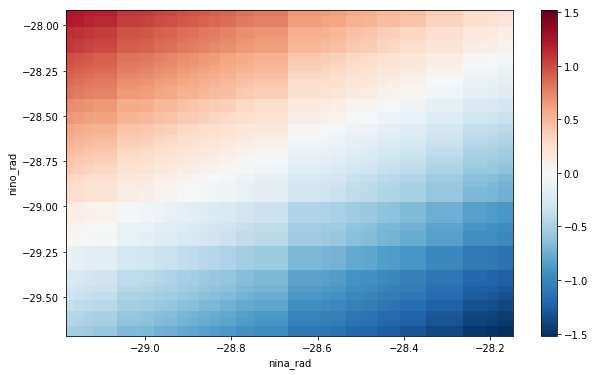

In [45]:
difference.plot()